In [21]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
#from census import Census
from config import gkey

gmaps.configure(api_key=gkey)


In [8]:
file = "Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

# pd.set_option("display.max_rows", 15)

base_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [9]:

base_df.city.unique()

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

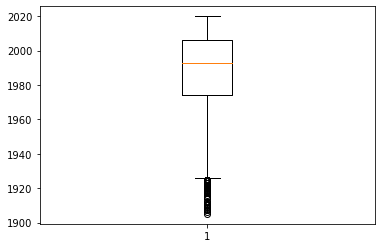

In [10]:
base_df.homeType.value_counts()
yearBuilt = base_df['yearBuilt']
#price = base_df['lot']
plt.boxplot(yearBuilt)
plt.show()

In [11]:

# we should rule out the outliers, below is a breakout that shows some homes have 27 rooms and 20 bathrooms.  

In [17]:
mask = base_df.city == 'austin'
newDf = base_df[mask].reset_index()
newDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15020 entries, 0 to 15019
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       15020 non-null  int64  
 1   zpid                        15020 non-null  int64  
 2   city                        15020 non-null  object 
 3   streetAddress               15020 non-null  object 
 4   zipcode                     15020 non-null  int64  
 5   description                 15020 non-null  object 
 6   latitude                    15020 non-null  float64
 7   longitude                   15020 non-null  float64
 8   propertyTaxRate             15020 non-null  float64
 9   garageSpaces                15020 non-null  int64  
 10  hasAssociation              15020 non-null  bool   
 11  hasCooling                  15020 non-null  bool   
 12  hasGarage                   15020 non-null  bool   
 13  hasHeating                  150

In [19]:
mask = newDf.lotSizeSqFt != 1508482800.0
cleanDf = newDf[mask]
cleanDf

,index,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,...,1,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
1,18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,...,1,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
2,19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,...,1,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
3,20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,...,1,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
4,21,121719682,austin,14108 Laurinburg Dr,78717,Stunning Modern Design~Super Well Maintained~M...,30.490257,-97.791740,2.21,2,...,1,1,3.266667,7.666667,1259,14,4.0,4,2,121719682_4a0a90d12c692fe1bd74b32f2a0dc05f-p_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15015,15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\r\n\r\nBeautiful one story home ...,30.161997,-97.816345,1.98,6,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15016,15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15017,15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15018,15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


In [44]:
squareFoot = cleanDf['lotSizeSqFt']
quartiles = squareFoot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = cleanDf['lotSizeSqFt'] < upper_bound
outlierGoneDf = cleanDf[mask]


Values below 0.0 could be outliers.
Values above 17424.0 could be outliers.


In [45]:
latestPrice = cleanDf['latestPrice']
quartiles = latestPrice.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = outlierGoneDf['latestPrice'] < upper_bound
outlierGoneDf = outlierGoneDf[mask]
outlierGoneDf.info()

Values below -87500.0 could be outliers.
Values above 972500.0 could be outliers.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 15019
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       13044 non-null  int64  
 1   zpid                        13044 non-null  int64  
 2   city                        13044 non-null  object 
 3   streetAddress               13044 non-null  object 
 4   zipcode                     13044 non-null  int64  
 5   description                 13044 non-null  object 
 6   latitude                    13044 non-null  float64
 7   longitude                   13044 non-null  float64
 8   propertyTaxRate             13044 non-null  float64
 9   garageSpaces                13044 non-null  int64  
 10  hasAssociation              13044 non-null  bool   
 11  hasCooling                  13044 non-null  bool   
 12  hasGar

The r-squared is: 0.11677893523897115


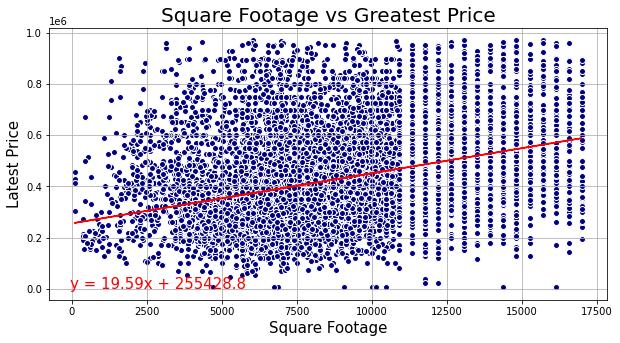

In [47]:
x_values = outlierGoneDf['lotSizeSqFt']
y_values = outlierGoneDf['latestPrice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Square Footage vs Greatest Price', fontsize=20)
plt.xlabel('Square Footage', fontsize=15)
plt.ylabel('Latest Price', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()